In [65]:
%matplotlib notebook

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
diffdays_data = '../Days_Diff/Day_Diff.csv'
diffdays_df = pd.read_csv(diffdays_data, parse_dates=True)
diffdays_df.head()

,Unnamed: 0,Unnamed: 0.1,Movie,Release Date_x,Award_date,Release Year,Days Difference
0,0,0,Capote,2005-09-30,2006-03-05,2005.0,156 days 00:00:00.000000000
1,1,1,American Hustle,2013-12-12,2014-03-02,2013.0,80 days 00:00:00.000000000
2,2,2,Brokeback Mountain,2005-09-10,2006-03-05,2005.0,176 days 00:00:00.000000000
3,3,3,Walk the Line,2005-09-13,2006-03-05,2005.0,173 days 00:00:00.000000000
4,4,4,"Good Night, and Good Luck.",2005-09-16,2006-03-05,2005.0,170 days 00:00:00.000000000


In [68]:
diffdays_df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Movie               object
Release Date_x      object
Award_date          object
Release Year       float64
Days Difference     object
dtype: object

In [69]:
#Convert 'Days Difference' to float and get ready for plot
diffdays_df['Days Difference'] = diffdays_df['Days Difference'].str.replace(' days 00:00:00.000000000','')
diffdays_df['Days Difference'] = diffdays_df['Days Difference'].fillna(0)
diffdays_df['Days Difference'] = diffdays_df['Days Difference'].astype(float)
diffdays_df.head()

,Unnamed: 0,Unnamed: 0.1,Movie,Release Date_x,Award_date,Release Year,Days Difference
0,0,0,Capote,2005-09-30,2006-03-05,2005.0,156.0
1,1,1,American Hustle,2013-12-12,2014-03-02,2013.0,80.0
2,2,2,Brokeback Mountain,2005-09-10,2006-03-05,2005.0,176.0
3,3,3,Walk the Line,2005-09-13,2006-03-05,2005.0,173.0
4,4,4,"Good Night, and Good Luck.",2005-09-16,2006-03-05,2005.0,170.0


In [70]:
diffdays_df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Movie               object
Release Date_x      object
Award_date          object
Release Year       float64
Days Difference    float64
dtype: object

In [71]:
#get max value of 'Days Difference'
diffdays_df['Days Difference'].max()

26076.0

In [72]:
#get min value of 'Days Difference'Days Difference
diffdays_df['Days Difference'].min()

53.0

In [75]:
#categorize ranges of days
bins = [0, 91, 181, 271, 99999]
labels = ['0-91', '92-180', '182-270', '272-366']

diffdays_df['Days Range(days)'] = pd.cut(diffdays_df['Days Difference'], bins=bins, labels=labels)
diffdays_df.head()

,Unnamed: 0,Unnamed: 0.1,Movie,Release Date_x,Award_date,Release Year,Days Difference,Days Range,Range Count,Days Range(days)
0,0,0,Capote,2005-09-30,2006-03-05,2005.0,156.0,92-180,,92-180
1,1,1,American Hustle,2013-12-12,2014-03-02,2013.0,80.0,0-91,,0-91
2,2,2,Brokeback Mountain,2005-09-10,2006-03-05,2005.0,176.0,92-180,,92-180
3,3,3,Walk the Line,2005-09-13,2006-03-05,2005.0,173.0,92-180,,92-180
4,4,4,"Good Night, and Good Luck.",2005-09-16,2006-03-05,2005.0,170.0,92-180,,92-180


In [76]:
#add new column and re-frame date frame
diffdays_df['Range Count'] = ""
diffdays_frame = diffdays_df[['Release Year', 'Days Range(days)', 'Range Count']]
diffdays_frame.head()

,Release Year,Days Range(days),Range Count
0,2005.0,92-180,
1,2013.0,0-91,
2,2005.0,92-180,
3,2005.0,92-180,
4,2005.0,92-180,


In [78]:
#count the Days Range 
range_count = diffdays_frame.groupby( [ "Days Range(days)"] ).count()["Range Count"]
range_count.head(150)

Days Range(days)
0-91        77
92-180     179
182-270     98
272-366    157
Name: Range Count, dtype: int64

In [99]:
range = [77, 179, 98, 157]
x_axis = np.arange(len(range))

<IPython.core.display.Javascript object>


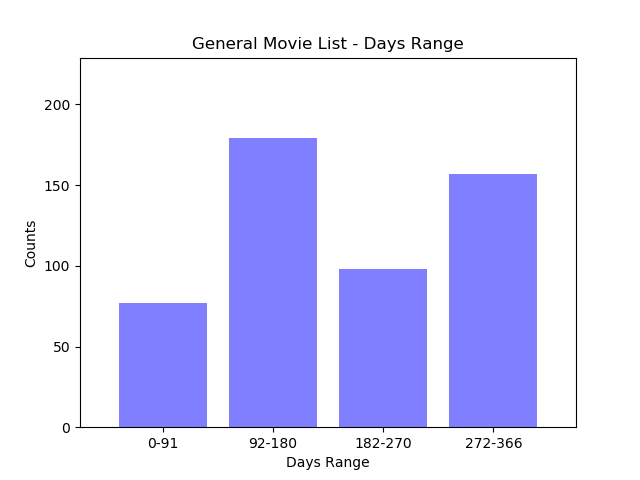

<BarContainer object of 4 artists>

In [100]:
plt.bar(x_axis, range, color='b', alpha=0.5, align="center")

In [104]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['0-91', '92-180', '182-270', '272-366'])

([<matplotlib.axis.XTick at 0x12371a7f0>,
 <a list of 4 Text xticklabel objects>)

In [105]:
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 3.75)

In [111]:
plt.ylim(0, max(range)+50)

(0, 229)

In [110]:
plt.title("General Movie List - Days Range")
plt.xlabel("Days Range")
plt.ylabel("Counts")

Text(38.2222,0.5,'Counts')